In [1]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn 
# !pip install matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv('UScomments.csv',on_bad_lines='skip',low_memory=False)
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [3]:
## missing data
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [4]:
## drop missing values 
comments.dropna(inplace=True)

## Performing Sentiment Analysis using TextBlob, NLTK Vader and Spacy
    
    

1. Using Textblob

In [5]:
# !pip install textblob
from textblob import TextBlob

TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity 

0.0

In [6]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [7]:
#Adding polarity column in comments dataframe 
comments['polarity'] = polarity
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


2. Using Vader

In [8]:
# Using NLTK

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia= SentimentIntensityAnalyzer()
vader_polarity = []
for comment in comments['comment_text']:
    vader_polarity.append(sia.polarity_scores(comment)['compound'])

print(len(vader_polarity))

691375


In [9]:
comments['vader_polarity'] = vader_polarity

print(comments.head())

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  vader_polarity  
0       0       0.0          0.0000  
1       0       0.0          0.0000  
2       0       0.0          0.0000  
3       0       0.0          0.4648  
4       0       0.0          0.0000  


3. Using Spacy

In [10]:
# !pip instal spacy
# !pip install spacytextblobl
# Takes too long to execute as compared to other 2 methods

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

spacy_polarity = [] 

for comment in comments['comment_text'][0:1000]:
    temp = nlp(comment)
    spacy_polarity.append(temp._.blob.polarity)
    
print(len(spacy_polarity))


1000


## WORD CLOUD ANALYSIS

1. Performing analysis on negative comments

In [11]:
# Separating out comments into positive and negative based on TextBlob's polarity 

comments_positive = comments[comments['polarity']==1]

comments_negative=comments[comments['polarity']==-1]

In [12]:
comments_negative.head(2)

,video_id,comment_text,likes,replies,polarity,vader_polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0,-0.8852
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0,0.0516


In [13]:
# !pip install wordcloud
from wordcloud import WordCloud , STOPWORDS

comments_negative['comment_text'].head()

512     BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562     Well… The brain surgeon Ben Carson just proved...
952            WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                       WTF BRUH!!!!!!
1391                      cheeseus christ thats insane!!!
Name: comment_text, dtype: object

In [14]:
# Creating a continuous paragraph of all comments for analysis

total_comments_neg = ' '.join(comments_negative['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

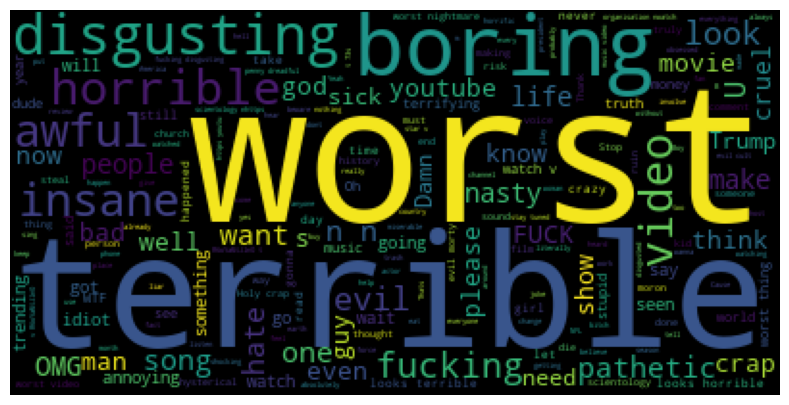

In [15]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_neg)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

2. Performing analysis on positive comments

(-0.5, 399.5, 199.5, -0.5)

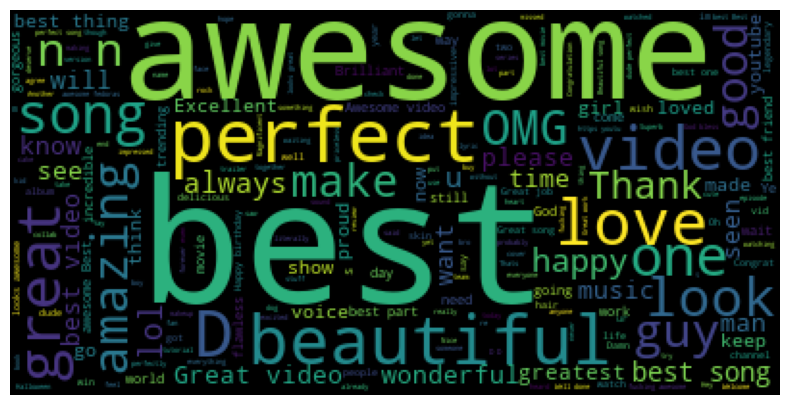

In [16]:
total_comments_pos =' '.join(comments_positive['comment_text'])
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_pos)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [17]:
### Conclusion-->> Users are emphasizing more on words like Terrible,worst,boring,disgusting,insane etc.. for negative comments

Different ways to find positive and negative comments using pandas and numpy's functions

In [18]:
pos_comments = comments.query('polarity == 1')['comment_text']
# pos_comments.head()
all_pos_comments = ' '.join(pos_comments)
print(all_pos_comments[:100])

yu are the best Power is the disease.  Care is the cure.  Keep caring for yourself and others as bes


In [19]:
total_comments2=' '.join(comments_positive['comment_text'])

## Emoji Analysis

In [20]:
# !pip install emoji
import emoji
print('\U0001F600')  # Unicode of emoji

### lets extract emoji from below comment
comment='trending 😉'

[c for c in comment if c in emoji.EMOJI_DATA]


😀


['😉']

In [21]:
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

len(emoji_list)

294549

In [22]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [23]:
### Computing frequencies of each & every emojis..

from collections import Counter

Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [24]:
Counter(emoji_list).most_common(10)[0][0]

'😂'

In [25]:
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [26]:
freqs=[Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [27]:
# !pip install plotly

import plotly.graph_objs as go
from plotly.offline import iplot

trace=go.Bar(x=emojis,y=freqs)
iplot([trace])

***Creating a Dictionary like {'emoji' : frequency} using 3 ways***

1. Naive approach - Iterating over the list and counting the frequency

In [28]:
emoji_count = {}
for emoji in emoji_list:
    if emoji in emoji_count:
        emoji_count[emoji] = emoji_count[emoji] + 1
    else:
        emoji_count[emoji] = 1
        
emoji_count['\U0001F600']

1734

2. Using List's in-built count function

In [29]:
emoji_count = {emoji:emoji_list.count(emoji) for emoji in set(emoji_list)}
emoji_count['\U0001F600']

1734

3. Using dictionary's in-built get function

In [30]:
emoji_count = {}
for emoji in emoji_list:
    emoji_count[emoji] = emoji_count.get(emoji, 0) + 1

emoji_count['\U0001F600']

1734

## 4..Collect Entire data of Youtube !

In [31]:
import os

In [32]:
csv_path=r'/Users/divya/Desktop/LinkedIn Learning Courses/Data Analysis Projects/Youtube Text analysis/Youtube_project_shan_singh/additional_data/CSV files'

In [33]:
files=os.listdir(csv_path)
files

['MXvideos.csv',
 '.DS_Store',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [34]:
files_csv=[files[i] for i in range(0,len(files))]
files_csv

['MXvideos.csv',
 '.DS_Store',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [35]:
full_df=pd.DataFrame()

for file in files_csv:
    current_df=pd.read_csv(csv_path+'/'+file,encoding='iso-8859-1',on_bad_lines='skip')
    
    current_df['country']=file.split('.')[0][0:2] #extracting country code from file name
    full_df=pd.concat([full_df,current_df])
    
# print(full_df[0:10])
# an unnecessary column named unnamed0 (due to encoding or OS) was getting included in the full_df, so dropped it.
full_df.drop(['Unnamed: 0'], axis=1) 
print(full_df[0:10])

      video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   
5  Q9kK6NWZR1U      17.14.11   
6  c9VTD3n_IDs      17.14.11   
7  XzULSsZYMRc      17.14.11   
8  uijjYNtl_UM      17.14.11   
9  cOJ68MQm2ac      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   
5  Asi se sintio Terremoto en iraq al bordo de ir...   
6  La Resolana con el Capi | Programa 12 noviembr...   
7  M6.7 Costa Rica AnÃ¡lisis de Terremotos en (((...   
8  7 NiÃ±os Famosos Que No Supieron Adaptarse a L...   
9  TOP: Los 7 libros infantiles mÃ¡s perturbadore...   

               channel_title  

## 5.. Which Category has the maximum likes ?

In [36]:
full_df['category_id'].unique()

array([24., 22., 25., 26., 10., 23., 17.,  2.,  1., 29., 27., 28., 20.,
       15., 19., 43., nan, 30., 44.])

In [37]:
cat=pd.read_csv('/Users/divya/Desktop/LinkedIn Learning Courses/Data Analysis Projects/Youtube Text analysis/Youtube_project_shan_singh/category_file.txt',sep=':')

In [38]:
cat.reset_index(inplace=True)

In [39]:
cat.columns=['category_id','Category_name']

In [40]:
cat.set_index('category_id',inplace=True)

In [41]:
cat

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [42]:
dct=cat.to_dict()

In [43]:
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [44]:
full_df['category_name']=full_df['category_id'].map(dct['Category_name'])

In [45]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Unnamed: 0',
       'category_name'],
      dtype='object')

In [46]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Unnamed: 0,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,1836.0,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,NaN,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,369.0,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,NaN,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,607.0,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,NaN,News & Politics


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' People & Blogs'),
  Text(2, 0, ' News & Politics'),
  Text(3, 0, ' Howto & Style'),
  Text(4, 0, ' Music'),
  Text(5, 0, ' Comedy'),
  Text(6, 0, ' Sports'),
  Text(7, 0, ' Autos & Vehicles'),
  Text(8, 0, ' Film & Animation'),
  Text(9, 0, ' Nonprofits & Activism'),
  Text(10, 0, ' Education'),
  Text(11, 0, ' Science & Technology'),
  Text(12, 0, ' Gaming'),
  Text(13, 0, ' Pets & Animals'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

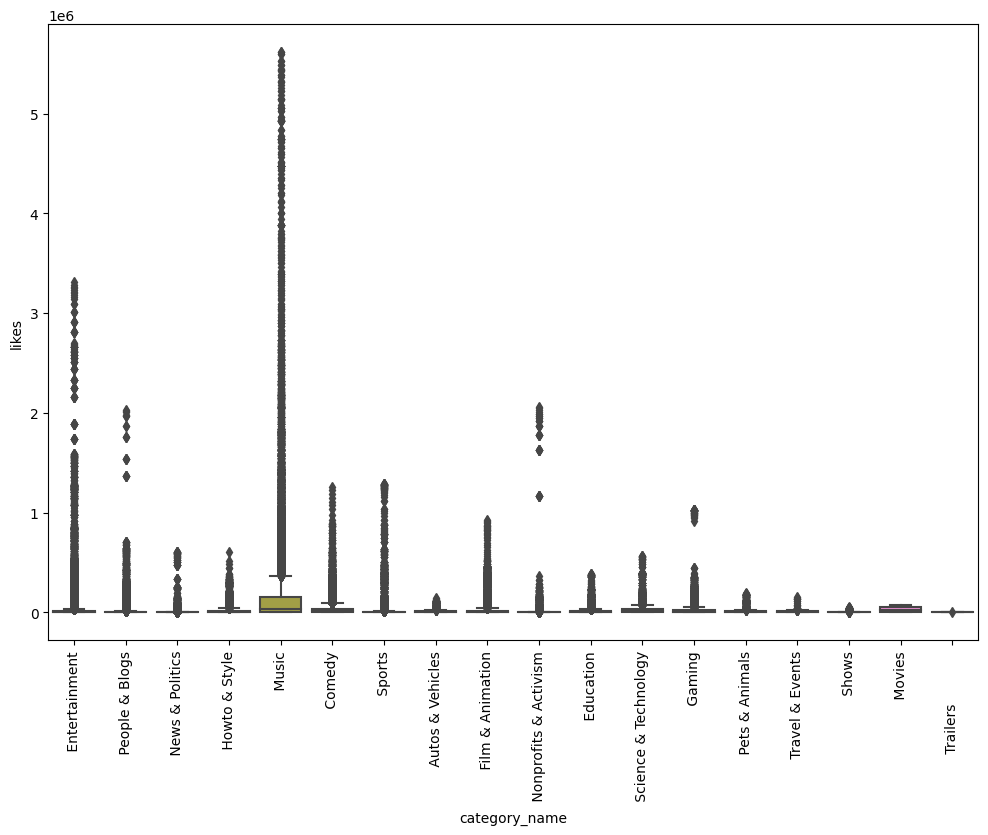

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=full_df)
plt.xticks(rotation='vertical')

### Try it :
    a)How to extract category from json file ( US_category_id.json)

In [48]:
import json 

f = open(r'/Users/divya/Desktop/LinkedIn Learning Courses/Data Analysis Projects/Youtube Text analysis/Youtube_project_shan_singh/additional_data/JSON files/US_category_id.json')
data = json.load(f)
categories = dict()

for category in data['items']:
    categories[int(category['id'])] = category['snippet']['title']
    # print(type(category['id']))
    # print(category['snippet']['title'])

categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

## 6.. Find out whether audience is engaged or not

In [49]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Unnamed: 0',
       'category_name'],
      dtype='object')

In [50]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [51]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Unnamed: 0,category_name,like_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,...,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,NaN,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,...,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,NaN,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,...,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,NaN,News & Politics,7.426652,0.195496,0.446114


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' People & Blogs'),
  Text(2, 0, ' News & Politics'),
  Text(3, 0, ' Howto & Style'),
  Text(4, 0, ' Music'),
  Text(5, 0, ' Comedy'),
  Text(6, 0, ' Sports'),
  Text(7, 0, ' Autos & Vehicles'),
  Text(8, 0, ' Film & Animation'),
  Text(9, 0, ' Nonprofits & Activism'),
  Text(10, 0, ' Education'),
  Text(11, 0, ' Science & Technology'),
  Text(12, 0, ' Gaming'),
  Text(13, 0, ' Pets & Animals'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

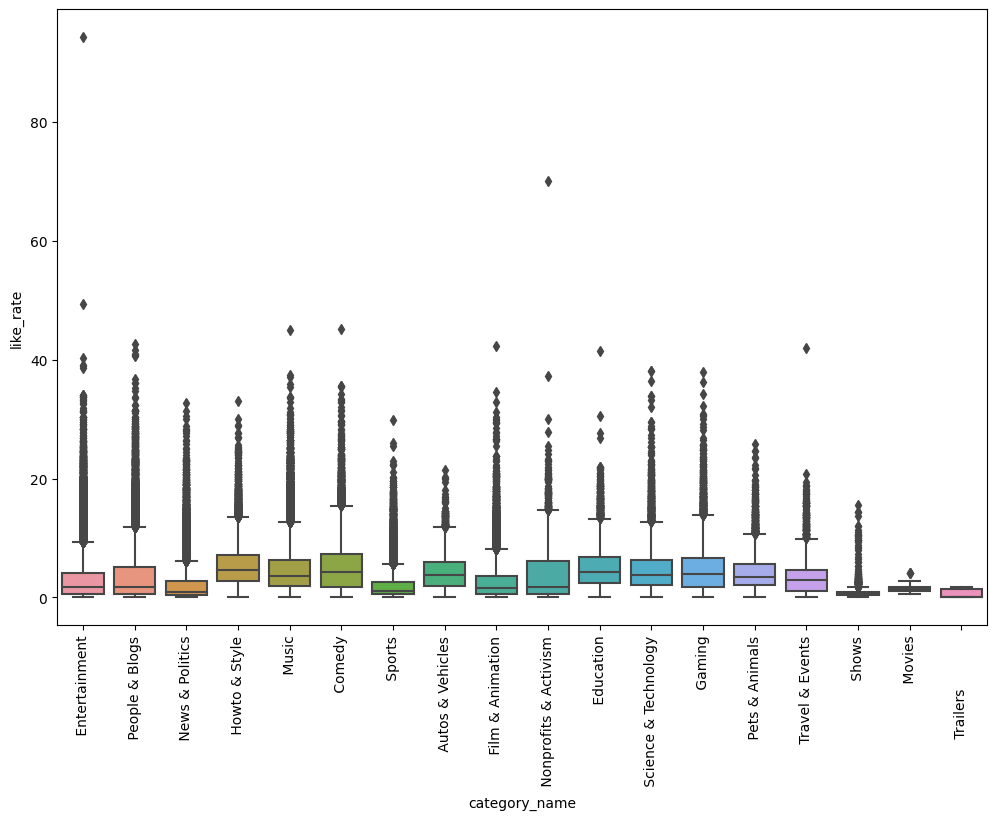

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=full_df)
plt.xticks(rotation='vertical')

In [53]:
### analysing relationship between views & likes

<Axes: xlabel='views', ylabel='likes'>

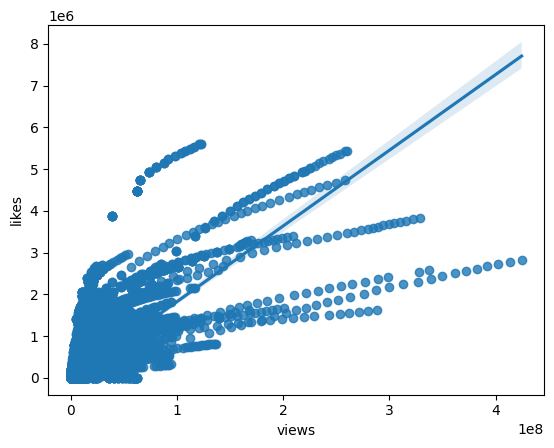

In [54]:
sns.regplot(data=full_df,x='views',y='likes')

In [55]:
### finding co-relation values between ['views', 'likes', 'dislikes']

<Axes: >

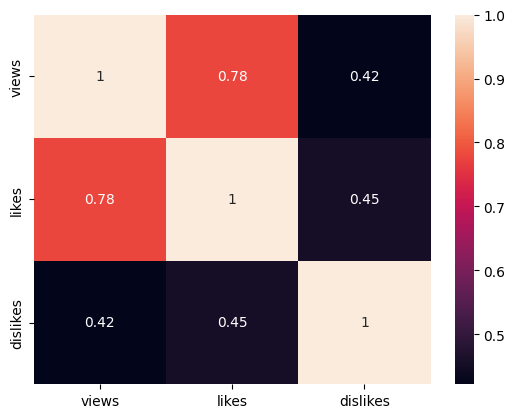

In [56]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(),annot=True)

Create scatterplot between 'views' & 'likes'

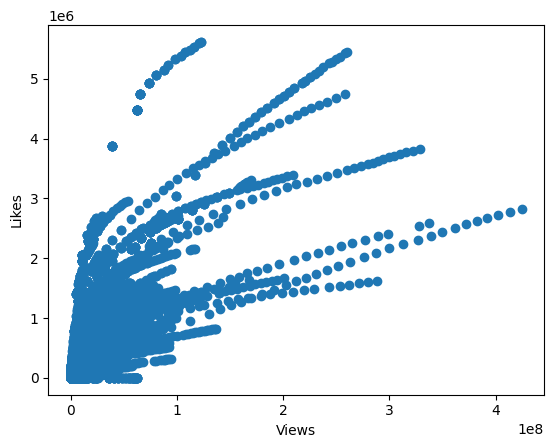

In [57]:
plt.scatter(full_df['views'], full_df['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')

plt.show()

## Which channels have the largest number of trending videos?

In [58]:
total_vids = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})
total_vids.head()

,channel_title,total_videos
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743


In [59]:
import plotly.express as px
px.bar(data_frame=total_vids[0:20],x='channel_title',y='total_videos')

Create Above Bar graph using 
1. Pandas

<Axes: xlabel='channel_title'>

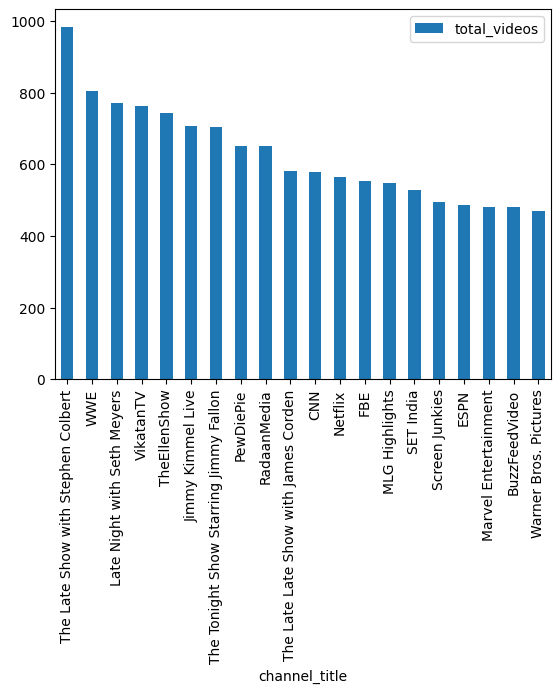

In [60]:
import warnings

warnings.filterwarnings("ignore")
total_vids[0:20].plot.bar(x='channel_title',y='total_videos')

2. Matplotlib 

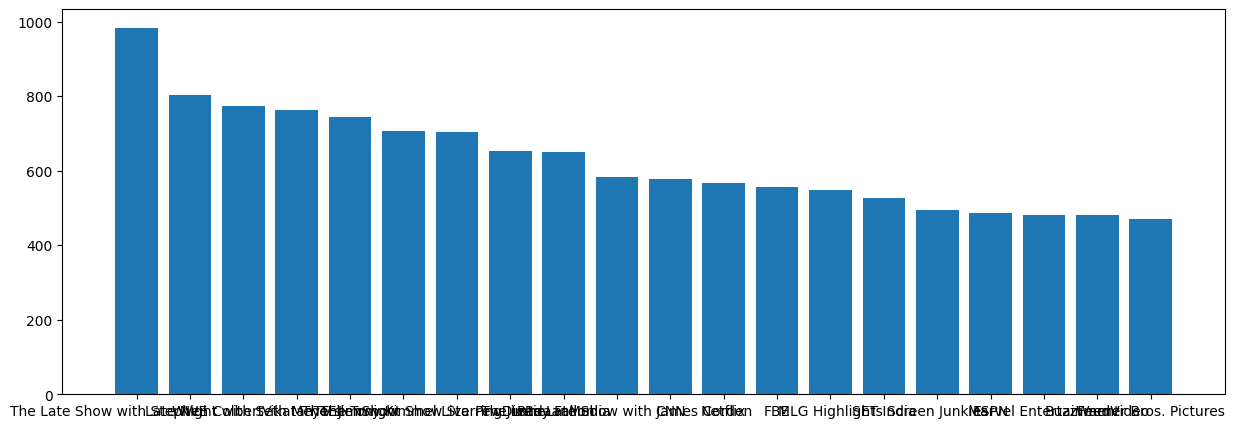

In [61]:
plt.figure(figsize=(15,5))
plt.bar(total_vids['channel_title'][0:20],total_vids['total_videos'][0:20])
plt.show()

3. Bokeh

In [62]:
# !pip install bokeh
from bokeh.plotting import figure, show

# output_file("bokeh.html")
graph = figure(x_range = total_vids['channel_title'][0:20],title='Using Bokeh')
graph.vbar(x=total_vids['channel_title'][0:20],top=total_vids['total_videos'][0:20],width=0.6)
show(graph)

4. Seaborn

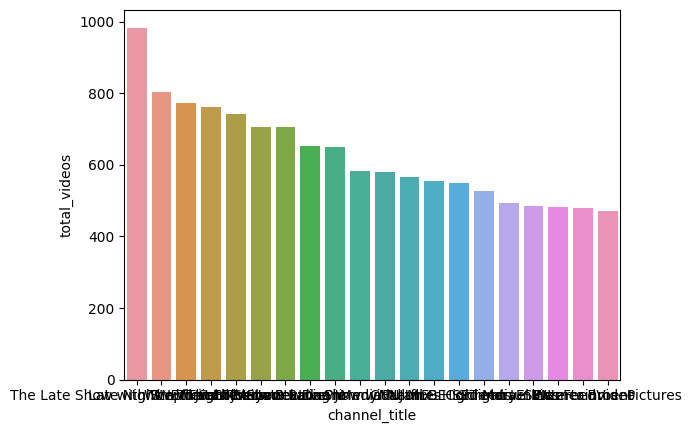

In [63]:
import seaborn as sns 

sns.barplot(x = total_vids['channel_title'][0:20],
            y = total_vids['total_videos'][0:20])
 
plt.show()

## Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

full_df['title'][0]

0                       CapÃ­tulo 12 | MasterChef 2017
0                                                  NaN
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0             Malika LePen : Femme de Gauche - Trailer
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
0        John Lewis Christmas Ad 2017 - #MozTheMonster
Name: title, dtype: object

In [66]:
text='Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
punc_count(text)

4

In [67]:
sample=full_df[0:10000]

In [68]:
sample['count_punc']=sample['title'].apply(punc_count)

In [69]:
sample.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,country,Unnamed: 0,category_name,like_rate,dislike_rate,comment_count_rate,count_punc
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,...,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,NaN,Entertainment,1.348467,0.116403,0.592010,1
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,...,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,NaN,People & Blogs,0.258164,0.165758,0.351522,3
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,...,False,False,La canciÃ³n del principio se llama âEste esp...,MX,NaN,News & Politics,7.426652,0.195496,0.446114,1
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,...,False,False,El video es de un Walmart en el pais centroame...,MX,NaN,News & Politics,0.393123,0.177842,0.216322,1
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,...,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX,NaN,Howto & Style,11.557009,0.136210,1.485704,1


<Axes: xlabel='count_punc', ylabel='views'>

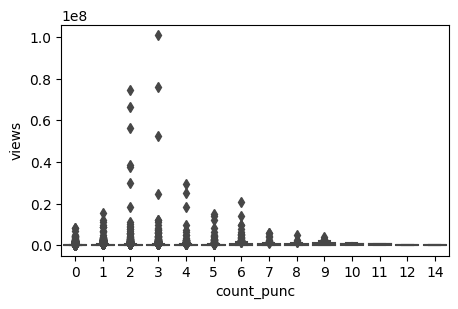

In [70]:
plt.figure(figsize=(5,3))
sns.boxplot(x='count_punc',y='views',data=sample)

In [71]:
sample['count_punc'].corr(sample['views']) 

# Conclusion - only 7% probability of higher views with more punctuation in video title 

0.06220850451653466

How to remove punctuation from data using Regular Expressions

In [72]:
import re 

temp = []

for title in sample['title']:
    temp.append(re.sub('[^a-zA-Z0-9]',' ',title))
                                    
sample['removed_punc'] = temp
sample[['title','removed_punc']].head()

,title,removed_punc
0,CapÃ­tulo 12 | MasterChef 2017,Cap tulo 12 MasterChef 2017
1,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,ALEXA EX INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,LOUIS CKAG EL PULSO DE LA REP BLICA
3,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Sismo de 6 7 sacude Costa Rica 12 Noviembre 2017
4,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,DOG HACKS MUSAS LESSLIE LOS POLINESIOS
